0. Import

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

1. Adeline algorithm

In [2]:
class AdalineGD(object):
    
    def __init__(self, rychlost_ucenia=0.01,pocet_iteracii = 50):

        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    def fit(self,X,y):
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    
    def predikcia(self,X):
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)

In [3]:
# dataframe
data = pd.read_csv('/content/drive/MyDrive/Škola/NS/cvicenie_4/kosatec_data.csv', header = None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,kosatec_bezlisty
146,6.3,2.5,5.0,1.9,kosatec_bezlisty
147,6.5,3.0,5.2,2.0,kosatec_bezlisty
148,6.2,3.4,5.4,2.3,kosatec_bezlisty


In [4]:
vstup = data.iloc[0:100, [0,2]].values
y = np.where((data.iloc[0:100,4]) == 'kosatec_sibirsky',-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
x = preprocessing.scale(vstup)

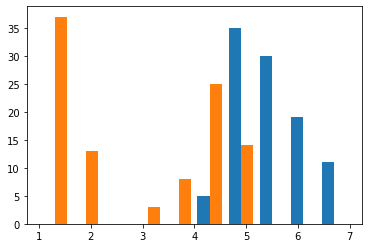

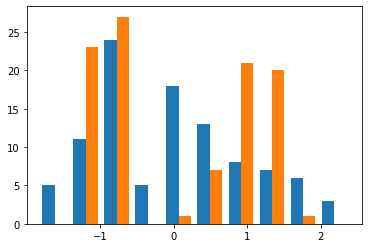

In [6]:
plt.hist(vstup)
plt.show()

plt2.hist(x)
plt2.show()

In [13]:
adaline = AdalineGD()
adaline.fit(x,y)

In [14]:
print(adaline.cost_)

[50.0, 33.82690621665537, 23.15304865175934, 16.108556308988394, 11.459358765771787, 8.390998869258786, 6.365954253061317, 5.029472928868976, 4.147427014607143, 3.565297671844979, 3.1811061391532736, 2.927548857378687, 2.76020707685978, 2.6497654783726463, 2.5768766478691667, 2.5287717518432014, 2.49702366361508, 2.4760706798357064, 2.4622422084611744, 2.453115745969254, 2.4470924976028567, 2.443117296815539, 2.4404937587612805, 2.43876228599037, 2.4376195551077227, 2.436865379880657, 2.436367642152768, 2.4360391470804377, 2.4358223481389496, 2.4356792659895063, 2.4355848351710314, 2.4355225130748615, 2.4354813819723895, 2.435454236422185, 2.435436321004128, 2.4354244972539467, 2.4354166938598025, 2.4354115438051047, 2.4354081448913885, 2.4354059016891063, 2.435404421228907, 2.435403444160356, 2.4354027993183323, 2.435402373737919, 2.435402092864962, 2.435401907495482, 2.4354017851560323, 2.4354017044149026, 2.435401651127674, 2.435401615959371]


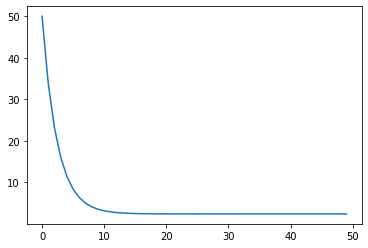

In [15]:
plt.plot(adaline.cost_)